<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./271_GEFF_fire_forecast_load_browse.ipynb"><< 271 - GEFF Global ECMWF Fire Forecasting - Load and browse</a><span style="float:right;"><a href="./273_GEFF_fire_forecast_custom_danger_classes.ipynb">273 - GEFF Global ECMWF Fire Forecasting - Custom Danger Classes>></a></span>

<div class="alert alert-block alert-success">
<b>20 - DATA DISCOVERY</b></div>

<div class="alert alert-block alert-success">
<b>PREREQUISITE</b>

* **20 - DATA DISCOVERY**
 - [271 - GEFF Fire Forecast - Load and browse](./271_GEFF_fire_forecast_load_browse.ipynb)

It is recommended to go through the module before you start with this module.

</div>

<div class="alert alert-block alert-success">
<b>SEE ALSO</b>

* **20 - DATA DISCOVERY**
 - [273 - GEFF Fire Forecast - Custom Danger Classes](./273_GEFF_fire_forecast_custom_danger_classes.ipynb) 

</div>

<hr>

# 2.7.2 Global ECMWF Fire Forecasting (GEFF) -  Harmonized Danger Classes

Raw FWI forecast values are expressed as a continuous rating in the range `[0, +Inf(very rarely above 100)]`. In order to aid decision makers raw forecasts are routinely converted into danger classes, based on the thresholds mentioned above, before being displayed by the EFFIS/GWIS viewer.

In this module, we are going to look at the predictive capability of the fire danger forecasts. Let us use the forecast issued on 14th July 2018 (leadtime = 10 days) to see whether dangerous fire weather could have been predicted in the area where the Attica fires started burning, from 23rd July onwards.

#### Module outline:
* [1 - Overview of fire danger classes](#fire_danger_classes)
* [2 - Other Indicators](#other_indicators)

<hr>

#### Load required libraries

In [1]:
# Import the necessary libraries and enable inline displaying of plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr


<hr>

## <a id='fire_danger_classes'></a>Overview of fire danger classes

According to EFFIS [documentation and user guidelines](https://effis.jrc.ec.europa.eu/about-effis/technical-background/fire-danger-forecast/):

- In most European countries, the core of the wildfire season starts on 1st of March and ends on 31st of October.
- The EFFIS network adopts the Canadian Forest Fire Weather Index (FWI) System as the method to assess the fire danger level in a harmonized way throughout Europe.
  
**European** Fire Danger Classes (FWI ranges, upper bound excluded):
  - Very low = 0 - 5.2
  - Low = 5.2 - 11.2 
  - Moderate = 11.2 - 21.3 
  - High = 21.3 - 38.0 
  - Very high = 38.0 - 50.0 
  - Extreme > 50.0

Based on ECMWF's experience, the above thresholds are particularly suited to assess fire danger in southern Europe, e.g. in the Mediterranean region. Some countries tend to calibrate these thresholds depending on local vegetation characteristics and fire regimes. This require local knowledge and/or experimentation.
For instance, **Portugal** uses the following thresholds for local-level assessments of fire danger: 
  - Reduced risk = 8.4
  - Moderate risk = 17.2
  - High risk = 24.6,
  - Maximum risk = 38.3

Northern European countries might be more inclined to the **Canadian** threshold levels:
  - Very Low = 0 - 1,
  - Low = 2 - 4,
  - Moderate = 5 - 8,
  - High = 9 - 16,
  - VeryHigh = 17 - 30,
  - Extreme > 30
  
And as another example, in **Indonesia** threshold levels are (probably due to high level of humidity):
  - Very Low = 0 - 3,
  - Low = 3 - 5,
  - Moderate = 5 - 10,
  - High = 10 - 17,
  - VeryHigh = 17 - 28,
  - Extreme > 28

#### Open the `raw RT HRES`  forecast for Attica (Greece), issued on 14th July 2018 (10 days before the Attica fires) and plot the raw forecast

In [6]:
# Open raw RT HRES forecast for Attica (Greece), issued on 14th July 2018 (10 days before the Attica fires)
ds = xr.open_dataset("../eodata/geff/greece/rt_hr/ECMWF_FWI_20180714_1200_hr_fwi_rt.nc")
ds.fwi[9].plot(figsize=(15,8));

<xarray.Dataset>
Dimensions:  (lat: 29, lon: 28, time: 10)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-14 2018-07-15 ... 2018-07-23
  * lon      (lon) float32 23.06 23.13 23.2 23.27 ... 24.75 24.82 24.89 24.96
  * lat      (lat) float32 38.98 38.91 38.84 38.77 ... 37.22 37.15 37.08 37.01
Data variables:
    fwi      (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.6 (http://mpimet.mp...
    history:           Mon May 04 13:19:57 2020: cdo --silent sellonlatbox,23...
    Conventions:       CF-1.6
    Reference date:    20180714
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    NCO:               4.6.7
    CDO:               Climate Data Operators version 1.9.6 (http://mpimet.mp...


#### Reclassify the `Fire Weather Index` levels according to the European Fire Danger classes


You can provide additional keyword arguments to xarray's function `xr.plot()` that help you to classify the data values:
* `levels`: provide the maximum bounds for each level in a list
* `colors`: provide the hexcolor codes for each class
* `label`: provide the class label

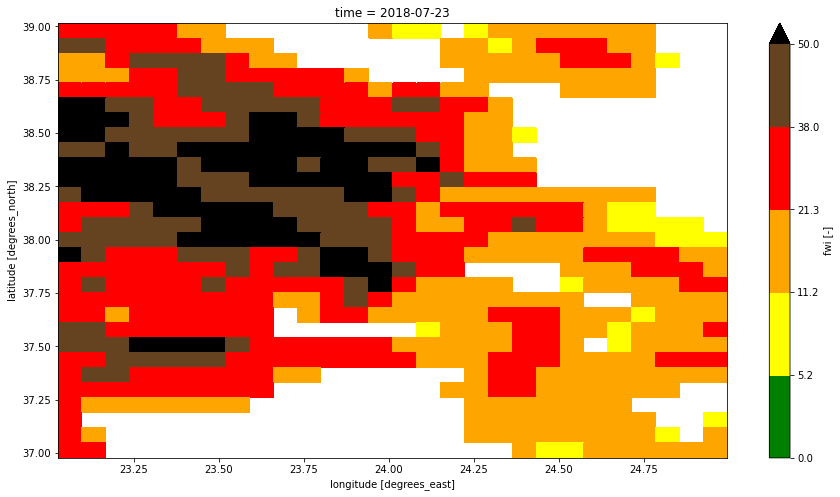

In [7]:
# Plot the re-classified forecast, Day 10
ds.fwi[9].plot(levels = [0.0, 5.2, 11.2, 21.3, 38.0, 50.0],
               colors = ["#008000", "#FFFF00", "#FFA500", "#FF0000", "#654321", "#000000"],
               label = ['Very low', 'Low', 'Moderate', 'High', 'Very high', 'Extreme'],
              figsize=(15,8));

#### Highlight only cells above `Very High` danger

With xarray's function `where`, you can filter your data based on a specific condition. Use the function to only highlight areas with a `very high` fire danger (> 38.0 degree Celsius).

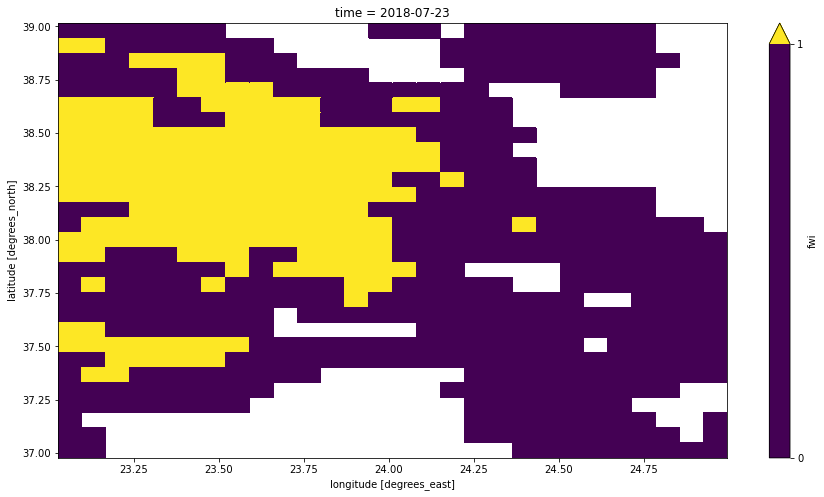

In [8]:
# Highlight only cells above Very High danger
ds_vh = xr.where(cond = ds < 38.0, x = 0, y = ds)
ds_vh.fwi[9].plot(levels = [0, 1],
                 figsize=(15,8));

## <a id='other_indicators'></a>Other danger indicators

Given the different climatic conditions in Europe, EFFIS also publishes two indicators that provide information on the local/temporal variability of the FWI compared to a historical series of approximately 30 years. These indicators are: 
* (a) the `ranking`, which provides percentiles of occurrence of the values, and 
* (b) the `anomaly`, computed as a standard deviation from the historical mean values. 


<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./271_GEFF_fire_forecast_load_browse.ipynb"><< 271 - GEFF Global ECMWF Fire Forecasting - Load and browse</a><span style="float:right;"><a href="./273_GEFF_fire_forecast_custom_danger_classes.ipynb">273 - GEFF Global ECMWF Fire Forecasting - Custom Danger Classes>></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>